## Compare deoxygenation in CM4 and ESM4

In [1]:
import xarray as xr
from static import *
import cftime
import matplotlib.pyplot as plt

In [2]:
datasets = ['cm4','esm4']
rootdir = '/work/gam/zarr/'

ds = xr.Dataset()
for dataset in datasets:
    filename = tracer_args()['o2']['gfdl_ppname'][dataset]+'.ts.zarr'
    path = rootdir+dataset_args()[dataset]['config_id']+'/'
    ds['o2_'+dataset] = xr.open_zarr(path+filename)['o2']

In [3]:
ds_xmean = ds.mean('lon',skipna=True)

In [4]:
t1 = ['1950','1969']
t2 = ['1990','2009']
t1slice = slice(t1[0]+'-01-01',t1[1]+'-12-31')
t2slice = slice(t2[0]+'-01-01',t2[1]+'-12-31')
t1label = t1[0]+' to '+t1[1]
t2label = t2[0]+' to '+t2[1]
dt = cftime.datetime(int(t2[1]),12,31)-cftime.datetime(int(t1[1]),12,31)
dt = dt.days*24*60*60

In [5]:
ds_xmean_t1 = ds_xmean.sel(time=t1slice).mean('time')
ds_xmean_t2 = ds_xmean.sel(time=t2slice).mean('time')

### Mean state (1990-2010)

In [6]:
def draw_yz(ds,datasets,clims=None,cmap=None):
    nd = len(datasets)
    fig,ax = plt.subplots(figsize=(12,3*nd),nrows=nd)
    for i,dataset in enumerate(datasets):
        axnow = ax[i]
        dsnow = ds.copy()
        X = dsnow['lat']
        Y = dsnow['z_l']
        Z = dsnow['o2_'+dataset]
        im = axnow.pcolormesh(X,Y,Z,shading='auto')
        if clims is not None:
            im.set_clim(clims)
        if cmap is not None:
            im.set_cmap(cmap)
        plt.colorbar(im,ax=axnow)
        axnow.invert_yaxis()
        axnow.set_title(dataset)
    fig.tight_layout()

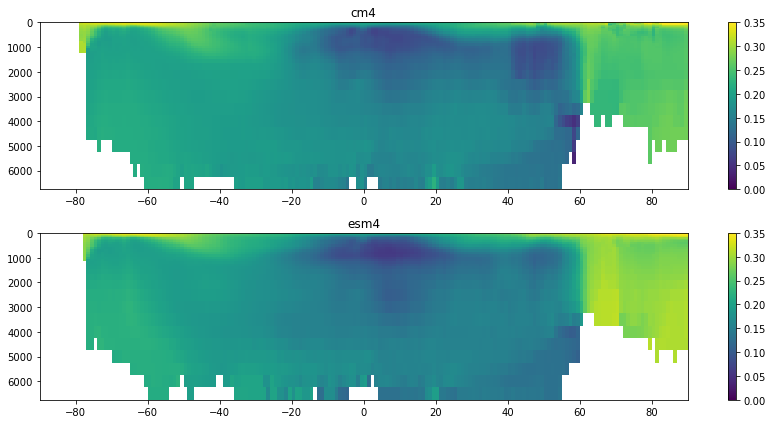

In [7]:
draw_yz(ds_xmean_t2,datasets,clims=[0,0.35])

### Difference (1990-2010)-(1950-1970)

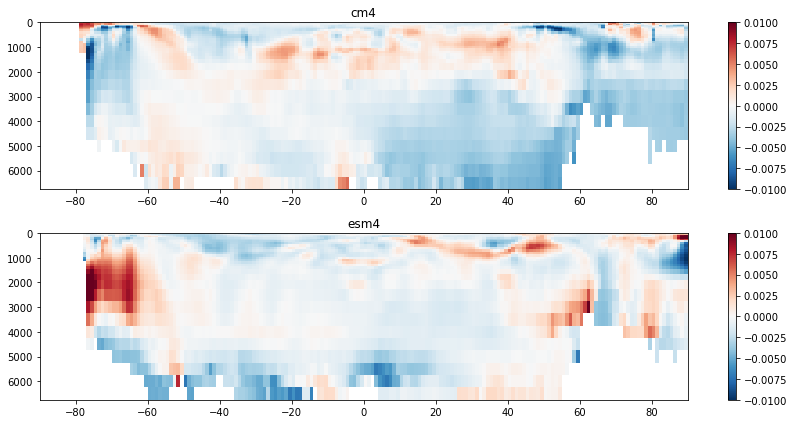

In [8]:
draw_yz(ds_xmean_t2-ds_xmean_t1,datasets,clims=[-0.01,0.01],cmap='RdBu_r')